<a href="https://colab.research.google.com/github/fiametahagos07/CSCE-5575-HW-2-Template/blob/master/fmh0047_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Data Quality Check

1.1 Using Python (pandas, matplotlib, or seaborn), load and inspect the Assignment 2 dataset.

In [ ]:
# Write your code here

from google.colab import files
uploaded = files.upload()


Saving Assignment 2 dataset.csv to Assignment 2 dataset.csv


**Write** code to explore the data distribution (e.g., region, type, year) and check whether there is any bias. Provide both the code and your interpretation.

   Column 1        Date  AveragePrice  Total Volume     4046       4225  \
0         0  12-27-2015          1.33      64236.62  1036.74   54454.85   
1         1  12-20-2015          1.35      54876.98   674.28   44638.81   
2         2  12-13-2015          0.93     118220.22   794.70  109149.67   
3         3   12-6-2015          1.08      78992.15  1132.00   71976.41   
4         4  11-29-2015          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4 

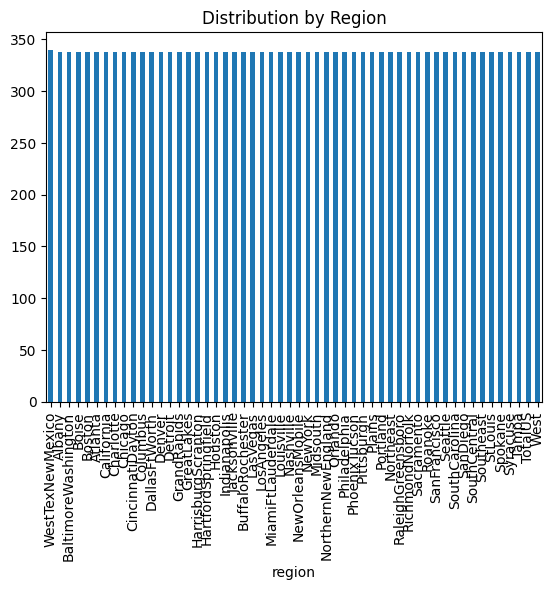

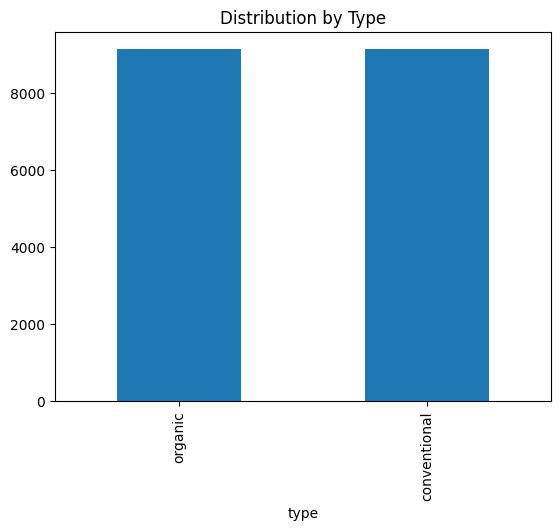

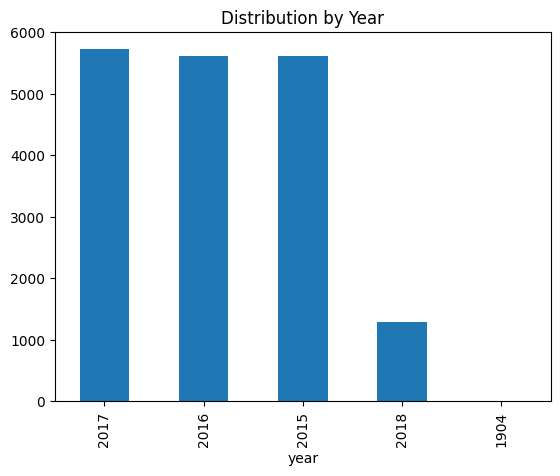

In [ ]:
# Write your code here

import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("Assignment 2 dataset.csv")

print(df.head())
print(df.info())


print(df["region"].value_counts())


if "type" in df.columns:
    print(df["type"].value_counts())


if "year" in df.columns:
    print(df["year"].value_counts())


df["region"].value_counts().plot(kind='bar', title='Distribution by Region')
plt.show()

if "type" in df.columns:
    df["type"].value_counts().plot(kind='bar', title='Distribution by Type')
    plt.show()

if "year" in df.columns:
    df["year"].value_counts().plot(kind='bar', title='Distribution by Year')
    plt.show()



1.2 Write Python code to check for duplicate rows and missing values in the dataset. Show the number of duplicates and missing values for each column. Then, explain (in comments or markdown) how you would handle these issues (e.g., drop, impute, or replace).

In [ ]:
# Write your code here

import pandas as pd


df = pd.read_csv("Assignment 2 dataset.csv")

duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values)


Number of duplicate rows: 2

Missing values per column:
Column 1        0
Date            0
AveragePrice    0
Total Volume    1
4046            2
4225            1
4770            1
Total Bags      1
Small Bags      2
Large Bags      2
XLarge Bags     1
type            1
year            0
region          0
dtype: int64


1.3 Use Python code to print the number of rows and columns in the dataset (e.g., with df.shape). Based on the dataset size, explain (briefly) whether you think the dataset is sufficient for training a machine learning model.

In [ ]:
# Write your code here

import pandas as pd


df = pd.read_csv("Assignment 2 dataset.csv")


rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")


Number of rows: 18254
Number of columns: 14


#2. Data Cleaning and Preprocessing

2.1 Remove the first column or “Column 1” from the dataset. Treat the ‘year’ variable as nominal.

In [ ]:
# Write your code here

import pandas as pd


df = pd.read_csv("Assignment 2 dataset.csv")


df = df.drop(columns=["Column 1"])


df["year"] = df["year"].astype(str)


print(df.head())
print(df.dtypes)


         Date  AveragePrice  Total Volume     4046       4225    4770  \
0  12-27-2015          1.33      64236.62  1036.74   54454.85   48.16   
1  12-20-2015          1.35      54876.98   674.28   44638.81   58.33   
2  12-13-2015          0.93     118220.22   794.70  109149.67  130.50   
3   12-6-2015          1.08      78992.15  1132.00   71976.41   72.58   
4  11-29-2015          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany  
Date             object
AveragePrice    float64
Total Volume    float64
404

2.2 Check for duplicate values and remove them.

In [ ]:
# Write your code here

import pandas as pd


df = pd.read_csv("Assignment 2 dataset.csv")

duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows before removal: {duplicate_count}")

df = df.drop_duplicates()

duplicate_count_after = df.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicate_count_after}")

print("Dataset shape after removing duplicates:", df.shape)


Number of duplicate rows before removal: 2
Number of duplicate rows after removal: 0
Dataset shape after removing duplicates: (18252, 14)


2.3 Check for missing values. If a data record (row) only has a few missing values, replace the missing values with the median of the column feature in that specific “Region” variable. If most column values in a data record are missing, remove the data record.

In [ ]:
# Write your code here

import pandas as pd
import numpy as np


df = pd.read_csv("Assignment 2 dataset.csv")

print("Missing values per column:")
print(df.isnull().sum())

row_missing_fraction = df.isnull().mean(axis=1)
df = df[row_missing_fraction <= 0.5]

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_cols:
    df[col] = df.groupby("region")[col].transform(
        lambda x: x.fillna(x.median())
    )

print("\nMissing values after processing:")
print(df.isnull().sum())

print("\nFinal dataset shape:", df.shape)


Missing values per column:
Column 1        0
Date            0
AveragePrice    0
Total Volume    1
4046            2
4225            1
4770            1
Total Bags      1
Small Bags      2
Large Bags      2
XLarge Bags     1
type            1
year            0
region          0
dtype: int64

Missing values after processing:
Column 1        0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Final dataset shape: (18253, 14)


2.4 Find the correlation between the variables and describe how the correlated values among the variables impact the model accuracy.


Correlation Matrix:
              Column 1  AveragePrice  Total Volume      4046      4225  \
Column 1      1.000000     -0.133205      0.014088  0.017664  0.019881   
AveragePrice -0.133205      1.000000     -0.192780 -0.208335 -0.172958   
Total Volume  0.014088     -0.192780      1.000000  0.977863  0.974181   
4046          0.017664     -0.208335      0.977863  1.000000  0.926111   
4225          0.019881     -0.172958      0.974181  0.926111  1.000000   
4770          0.041793     -0.179469      0.872204  0.833390  0.887856   
Total Bags   -0.002167     -0.177116      0.963048  0.920057  0.905789   
Small Bags    0.000385     -0.174751      0.967239  0.925281  0.916032   
Large Bags   -0.009158     -0.172960      0.880641  0.838646  0.810017   
XLarge Bags  -0.011505     -0.117615      0.747159  0.699379  0.688811   
year         -0.124118      0.064438      0.014012  0.003606 -0.006031   

                  4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
Column 1      0.

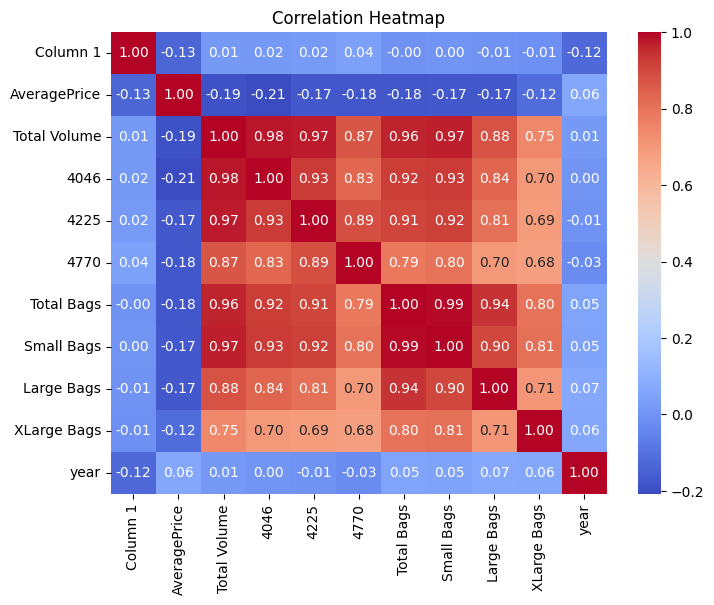

In [ ]:
# Write your code here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Assignment 2 dataset.csv")

numeric_df = df.select_dtypes(include=["int64", "float64"])

correlation_matrix = numeric_df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


#3. Exploratory Data Analysis (EDA)


3.1 Describe the variables
- Describe all variables in the dataset.
- For continuous variables: report **range (min, max), mean, median, and distribution**.
- For categorical variables: list unique values.

In [ ]:
# Write your code here

import pandas as pd


df = pd.read_csv("Assignment 2 dataset.csv")

print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

print("\n=== Continuous Variables Summary ===")
for col in numeric_cols:
    print(f"\nColumn: {col}")
    print(f"Min: {df[col].min()}")
    print(f"Max: {df[col].max()}")
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print("Value Distribution:")
    print(df[col].describe())

categorical_cols = df.select_dtypes(include=["object"]).columns

print("\n=== Categorical Variables Summary ===")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print("Unique Values:")
    print(df[col].unique())


Dataset Shape: (18254, 14)

Column Names:
['Column 1', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region']

=== Continuous Variables Summary ===

Column: Column 1
Min: 0
Max: 52
Mean: 24.228059603374604
Median: 24.0
Value Distribution:
count    18254.000000
mean        24.228060
std         15.480994
min          0.000000
25%         10.000000
50%         24.000000
75%         38.000000
max         52.000000
Name: Column 1, dtype: float64

Column: AveragePrice
Min: 0.44
Max: 3.25
Mean: 1.4060731894379315
Median: 1.37
Value Distribution:
count    18254.000000
mean         1.406073
std          0.402668
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64

Column: Total Volume
Min: 84.56
Max: 62505646.52
Mean: 850460.9394757026
Median: 107306.08
Value Distribution:
count    1.825300e+04
mean     8.504609

3.2 Inspect the earliest recorded date
- Find the earliest `Date`.
- Check if there are avocado prices recorded from the earliest date up to 2010.
- Comment: does the earliest data point look reasonable? Keep or remove?

In [ ]:
# Write your code here

import pandas as pd

df = pd.read_csv("Assignment 2 dataset.csv")

df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

earliest_date = df["Date"].min()
print("Earliest Date in dataset:", earliest_date)

pre_2010 = df[df["Date"].dt.year <= 2010]

print("Number of avocado price records up to 2010:", len(pre_2010))

print("\nSample records before or in 2010:")
print(pre_2010.head())



Earliest Date in dataset: 1904-01-21 00:00:00
Number of avocado price records up to 2010: 1

Sample records before or in 2010:
       Column 1       Date  AveragePrice  Total Volume     4046     4225  \
18250         9 1904-01-21          1.87      13766.76  1191.92  2452.79   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18250  727.94     9394.11      9351.8       42.31          0.0  organic  1904   

                 region  
18250  WestTexNewMexico  


3.3 Highest average price
- Find the highest value in "AveragePrice".
- Report which region it belongs to.
- Describe how you obtained the result.

In [ ]:
# Write your code here

import pandas as pd

df = pd.read_csv("Assignment 2 dataset.csv")

max_price = df["AveragePrice"].max()

max_price_rows = df[df["AveragePrice"] == max_price]

print("Highest AveragePrice:", max_price)
print("\nRegion(s) with the highest AveragePrice:")
print(max_price_rows[["region", "AveragePrice"]])


Highest AveragePrice: 3.25

Region(s) with the highest AveragePrice:
             region  AveragePrice
14125  SanFrancisco          3.25


3.4 Highest total volume
- Find the highest total volume of avocados.
- Report which region it belongs to.
- Describe how you obtained the result.

In [ ]:
# Write your code here

import pandas as pd

df = pd.read_csv("Assignment 2 dataset.csv")

max_volume = df["Total Volume"].max()

max_volume_rows = df[df["Total Volume"] == max_volume]

print("Highest Total Volume:", max_volume)
print("\nRegion(s) with the highest Total Volume:")
print(max_volume_rows[["region", "Total Volume"]])



Highest Total Volume: 62505646.52

Region(s) with the highest Total Volume:
       region  Total Volume
9097  TotalUS   62505646.52
